In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn import metrics


In [18]:
df = pd.read_csv('all_data_2011_2019.cvs', sep=',')

In [420]:
df = pd.read_csv('1993_2019_everything2.csv', sep=',')

In [334]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'winner',
       'point_difference', 'result', 'name_x', 'team_seed', 'win',
       'higher_or_lower_seed', 'index', 'year_x', 'Name', 'BLKPG', 'STPG',
       'APG', 'AST_TO', '_3pm', '_3pa', '_2pm', '_2pa', '_2p_perc', 'PTS',
       'FG_perc', '_3p_perc', 'FT_perc', 'year_y', 'ORPG', 'DRPG', 'RPG',
       'other_team_seed', 'names_for_merging_sr', 'index_everything', 'name_y',
       'SRS_adv', 'SOS_adv', 'eFG_perc_adv', 'year_adv', 'SRS_adv_opponent',
       'SOS_adv_opponent', 'eFG_perc_adv_opponent', 'SRS_adv_subtracted',
       'SOS_adv_subtracted', 'eFG_perc_adv_subtracted', 'BLKPG_opponent',
       'STPG_opponent', 'APG_opponent', 'AST_TO_opponent', '_3pm_opponent',
       '_3pa_opponent', '_2pm_opponent', '_2pa_opponent', '_2p_perc_opponent',
       'FG_perc_opponent', '_3p_perc_opponent', 'FT_perc_opponent',
       'ORPG_opponent', 'DRPG_opponent', 'RPG_opponent',
       'other_team_seed_opponent', 'BLKPG_subtracted', 'STP

In [426]:
df1=df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'winner', 'name_x','name_y',
        'result',  'index', 'year_x', 'Name', 'year_y',
        'names_for_merging_sr', 'index_everything', 'name_y'], axis = 1)

In [427]:
df1=df1.drop(['Unnamed: 0.1.1.1'], axis = 1)

In [428]:
df1.columns

Index(['point_difference', 'team_seed', 'win', 'higher_or_lower_seed', 'BLKPG',
       'STPG', 'APG', 'AST_TO', '_3pm', '_3pa', '_2pm', '_2pa', '_2p_perc',
       'PTS', 'FG_perc', '_3p_perc', 'FT_perc', 'ORPG', 'DRPG', 'RPG',
       'other_team_seed', 'SRS_adv', 'SOS_adv', 'eFG_perc_adv', 'year_adv',
       'SRS_adv_opponent', 'SOS_adv_opponent', 'eFG_perc_adv_opponent',
       'SRS_adv_subtracted', 'SOS_adv_subtracted', 'eFG_perc_adv_subtracted',
       'BLKPG_opponent', 'STPG_opponent', 'APG_opponent', 'AST_TO_opponent',
       '_3pm_opponent', '_3pa_opponent', '_2pm_opponent', '_2pa_opponent',
       '_2p_perc_opponent', 'FG_perc_opponent', '_3p_perc_opponent',
       'FT_perc_opponent', 'ORPG_opponent', 'DRPG_opponent', 'RPG_opponent',
       'other_team_seed_opponent', 'BLKPG_subtracted', 'STPG_subtracted',
       'APG_subtracted', 'AST_TO_subtracted', '_3pm_subtracted',
       '_3pa_subtracted', '_2pm_subtracted', '_2pa_subtracted',
       '_2p_perc_subtracted', 'PTS_opponent', 

In [137]:
just_seeding = df1.drop(['BLKPG',
       'STPG', 'APG', 'AST_TO', '_3pm', '_3pa', '_2pm', '_2pa', '_2p_perc',
       'PTS', 'FG_perc', '_3p_perc', 'FT_perc', 'ORPG', 'DRPG', 'RPG', 'SRS_adv', 'SOS_adv', 'pace_adv', 'ORtg_adv',
       'eFG_perc_adv', 'year_adv', 'SRS_adv_opponent', 'SOS_adv_opponent',
       'pace_adv_opponent', 'ORtg_adv_opponent', 'eFG_perc_adv_opponent',
       'SRS_adv_subtracted', 'SOS_adv_subtracted', 'pace_adv_subtracted',
       'ORtg_adv_subtracted', 'eFG_perc_adv_subtracted'],
      axis=1)

In [138]:
just_seeding

,point_difference,team_seed,win,higher_or_lower_seed,other_team_seed,round
0,15,1,1,1,16,1
1,15,16,0,0,1,1
2,1,8,1,1,9,1
3,1,9,0,0,8,1
4,7,5,1,1,12,1
5,7,12,0,0,5,1
6,9,4,1,1,13,1
7,9,13,0,0,4,1
8,5,6,0,1,11,1
9,5,11,1,0,6,1


# Getting rid of the 9999 which was inputted for games with the same seed numbers

In [312]:
df2.to_csv('df2.csv')

In [339]:
df[(df['higher_or_lower_seed']==9999)]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,winner,point_difference,result,name_x,team_seed,win,higher_or_lower_seed,index,year_x,Name,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,year_y,ORPG,DRPG,RPG,other_team_seed,names_for_merging_sr,index_everything,name_y,SRS_adv,SOS_adv,eFG_perc_adv,year_adv,SRS_adv_opponent,SOS_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,eFG_perc_adv_subtracted,BLKPG_opponent,STPG_opponent,APG_opponent,AST_TO_opponent,_3pm_opponent,_3pa_opponent,_2pm_opponent,_2pa_opponent,_2p_perc_opponent,FG_perc_opponent,_3p_perc_opponent,FT_perc_opponent,ORPG_opponent,DRPG_opponent,RPG_opponent,other_team_seed_opponent,BLKPG_subtracted,STPG_subtracted,APG_subtracted,AST_TO_subtracted,_3pm_subtracted,_3pa_subtracted,_2pm_subtracted,_2pa_subtracted,_2p_perc_subtracted,PTS_opponent,PTS_subtracted,FG_perc_subtracted,_3p_perc_subtracted,FT_perc_subtracted,ORPG_subtracted,DRPG_subtracted,RPG_subtracted,round
122,122,122,1130,1,0,0,Kentucky,1,9999,9999,122,1993,Kentucky,5.26,5.19,13.7,1.09,4.8,15.0,567.0,1115.0,0.509,74.9,0.461,0.327,0.791,1993,9.7,27.7,37.4,1,Kentucky,122,Kentucky,26.91,9.23,0.558,1993,22.03,11.89,0.532,4.88,-2.66,0.026,4.63,5.37,15.0,1.37,8.3,24.0,526.0,982.0,0.536,0.460,0.345,0.717,9.1,28.0,37.0,1,0.63,-0.18,-1.3,-0.28,-3.5,-9.0,41.0,133.0,-0.027,75.4,-0.5,0.001,-0.018,0.074,0.6,-0.3,0.4,5
123,123,123,1131,1,0,0,Michigan,1,9999,9999,123,1993,Michigan,4.63,5.37,15.0,1.37,8.3,24.0,526.0,982.0,0.536,75.4,0.460,0.345,0.717,1993,9.1,28.0,37.0,1,Michigan,123,Michigan,22.03,11.89,0.532,1993,26.91,9.23,0.558,-4.88,2.66,-0.026,5.26,5.19,13.7,1.09,4.8,15.0,567.0,1115.0,0.509,0.461,0.327,0.791,9.7,27.7,37.4,1,-0.63,0.18,1.3,0.28,3.5,9.0,-41.0,-133.0,0.027,74.9,0.5,-0.001,0.018,-0.074,-0.6,0.3,-0.4,5
124,124,124,1132,1,0,0,UNC,1,9999,9999,124,1993,North Carolina,3.70,5.93,14.4,1.08,5.3,18.0,552.0,1190.0,0.464,70.6,0.413,0.291,0.663,1993,13.9,28.7,42.6,1,North Carolina,124,North Carolina,29.04,11.25,0.541,1993,22.03,11.89,0.532,7.01,-0.64,0.009,4.63,5.37,15.0,1.37,8.3,24.0,526.0,982.0,0.536,0.460,0.345,0.717,9.1,28.0,37.0,1,-0.93,0.56,-0.6,-0.29,-3.0,-6.0,26.0,208.0,-0.072,75.4,-4.8,-0.047,-0.054,-0.054,4.8,0.7,5.6,6
125,125,125,1133,1,0,0,Michigan,1,9999,9999,125,1993,Michigan,4.63,5.37,15.0,1.37,8.3,24.0,526.0,982.0,0.536,75.4,0.460,0.345,0.717,1993,9.1,28.0,37.0,1,Michigan,125,Michigan,22.03,11.89,0.532,1993,29.04,11.25,0.541,-7.01,0.64,-0.009,3.70,5.93,14.4,1.08,5.3,18.0,552.0,1190.0,0.464,0.413,0.291,0.663,13.9,28.7,42.6,1,0.93,-0.56,0.6,0.29,3.0,6.0,-26.0,-208.0,0.072,70.6,4.8,0.047,0.054,0.054,-4.8,-0.7,-5.6,6
374,374,374,1382,2,0,0,UNC,2,9999,9999,122,1995,North Carolina,3.70,5.93,14.4,1.08,5.3,18.0,552.0,1190.0,0.464,70.6,0.413,0.291,0.663,1995,13.9,28.7,42.6,2,North Carolina,374,North Carolina,23.45,13.01,0.573,1995,16.85,10.45,0.533,6.60,2.56,0.040,3.67,8.37,11.7,0.98,7.1,22.0,487.0,953.0,0.511,0.437,0.320,0.727,7.6,24.2,31.8,2,0.03,-2.44,2.7,0.10,-1.8,-4.0,65.0,237.0,-0.047,74.0,-3.4,-0.024,-0.029,-0.064,6.3,4.5,10.8,5
375,375,375,1383,2,0,0,Arkansas,2,9999,9999,123,1995,Arkansas,3.67,8.37,11.7,0.98,7.1,22.0,487.0,953.0,0.511,74.0,0.437,0.320,0.727,1995,7.6,24.2,31.8,2,Arkansas,375,Arkansas,16.85,10.45,0.533,1995,23.45,13.01,0.573,-6.60,-2.56,-0.040,3.70,5.93,14.4,1.08,5.3,18.0,552.0,1190.0,0.464,0.413,0.291,0.663,13.9,28.7,42.6,2,-0.03,2.44,-2.7,-0.10,1.8,4.0,-65.0,-237.0,0.047,70.6,3.4,0.024,0.029,0.064,-6.3,-4.5,-10.8,5
498,498,498,1506,1,0,0,Kentucky,1,9999,9999,120,1996,Kentucky,5.26,5.19,13.7,1.09,4.8,15.0,567.0,1115.0,0.509,74.9,0.461,0.327,0.791,1996,9.7,27.7,37.4,1,Kentucky,498,Kentucky,32.14,10.06,0.541,1996,21.38,8.92,0.490,10.76,1.14,0.051,3.07,7.04,13.1,0.98,7.4,23.0,469.0,952.0,0.493,0.426,0.324,0.691,9.4,23.3,32.7,1,2.19,-1.85,0.6,0.11,-2.6,-8.0,98.0,163.0,0.016,68.7,6.2,0.035,0.003,0.100,0.3,4.4,4.7,5
499,499,499,1507,1,0,0,UMass,1,9999,9999,121,1996,UMass,3.07,7.04,13.1,0.98,7.4,23.0,469.0,952.0,0.493,68.7,0.426,0.324,0.691,199

In [243]:
df1[(df1['higher_or_lower_seed']==9999) & (df1['Name']=='Ohio State')]

,point_difference,team_seed,win,higher_or_lower_seed,Name,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,ORPG,DRPG,RPG,other_team_seed,SRS_adv,SOS_adv,pace_adv,ORtg_adv,eFG_perc_adv,SRS_adv_opponent,SOS_adv_opponent,pace_adv_opponent,ORtg_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,pace_adv_subtracted,ORtg_adv_subtracted,eFG_perc_adv_subtracted,round
248,0,2,0,9999,Ohio State,2.97,7.33,15.2,1.31,4.9,15.0,752.0,1390.0,0.541,75.1,0.486,0.329,0.698,11.7,25.1,36.8,2,23.95,9.07,66.9,111.6,0.521,21.72,9.93,67.3,108.8,0.523,2.23,-0.86,-0.4,2.8,-0.002,5


In [414]:
#this works to change a value in the dataframe
df.loc[(df['Unnamed: 0.1.1'] == 4279), 'win'] = 0

In [421]:
df[(df['higher_or_lower_seed']==9999)]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,winner,point_difference,result,name_x,team_seed,win,higher_or_lower_seed,index,year_x,Name,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,year_y,ORPG,DRPG,RPG,other_team_seed,names_for_merging_sr,index_everything,name_y,SRS_adv,SOS_adv,eFG_perc_adv,year_adv,SRS_adv_opponent,SOS_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,eFG_perc_adv_subtracted,BLKPG_opponent,STPG_opponent,APG_opponent,AST_TO_opponent,_3pm_opponent,_3pa_opponent,_2pm_opponent,_2pa_opponent,_2p_perc_opponent,FG_perc_opponent,_3p_perc_opponent,FT_perc_opponent,ORPG_opponent,DRPG_opponent,RPG_opponent,other_team_seed_opponent,BLKPG_subtracted,STPG_subtracted,APG_subtracted,AST_TO_subtracted,_3pm_subtracted,_3pa_subtracted,_2pm_subtracted,_2pa_subtracted,_2p_perc_subtracted,PTS_opponent,PTS_subtracted,FG_perc_subtracted,_3p_perc_subtracted,FT_perc_subtracted,ORPG_subtracted,DRPG_subtracted,RPG_subtracted,round
122,122,122,122,1130,1,0,0,Kentucky,1,0,9999,122,1993,Kentucky,5.26,5.19,13.7,1.09,4.8,15.0,567.0,1115.0,0.509,74.9,0.461,0.327,0.791,1993,9.7,27.7,37.4,1,Kentucky,122,Kentucky,26.91,9.23,0.558,1993,22.03,11.89,0.532,4.88,-2.66,0.026,4.63,5.37,15.0,1.37,8.3,24.0,526.0,982.0,0.536,0.460,0.345,0.717,9.1,28.0,37.0,1,0.63,-0.18,-1.3,-0.28,-3.5,-9.0,41.0,133.0,-0.027,75.4,-0.5,0.001,-0.018,0.074,0.6,-0.3,0.4,5
123,123,123,123,1131,1,0,0,Michigan,1,1,9999,123,1993,Michigan,4.63,5.37,15.0,1.37,8.3,24.0,526.0,982.0,0.536,75.4,0.460,0.345,0.717,1993,9.1,28.0,37.0,1,Michigan,123,Michigan,22.03,11.89,0.532,1993,26.91,9.23,0.558,-4.88,2.66,-0.026,5.26,5.19,13.7,1.09,4.8,15.0,567.0,1115.0,0.509,0.461,0.327,0.791,9.7,27.7,37.4,1,-0.63,0.18,1.3,0.28,3.5,9.0,-41.0,-133.0,0.027,74.9,0.5,-0.001,0.018,-0.074,-0.6,0.3,-0.4,5
124,124,124,124,1132,1,0,0,UNC,1,1,9999,124,1993,North Carolina,3.70,5.93,14.4,1.08,5.3,18.0,552.0,1190.0,0.464,70.6,0.413,0.291,0.663,1993,13.9,28.7,42.6,1,North Carolina,124,North Carolina,29.04,11.25,0.541,1993,22.03,11.89,0.532,7.01,-0.64,0.009,4.63,5.37,15.0,1.37,8.3,24.0,526.0,982.0,0.536,0.460,0.345,0.717,9.1,28.0,37.0,1,-0.93,0.56,-0.6,-0.29,-3.0,-6.0,26.0,208.0,-0.072,75.4,-4.8,-0.047,-0.054,-0.054,4.8,0.7,5.6,6
125,125,125,125,1133,1,0,0,Michigan,1,0,9999,125,1993,Michigan,4.63,5.37,15.0,1.37,8.3,24.0,526.0,982.0,0.536,75.4,0.460,0.345,0.717,1993,9.1,28.0,37.0,1,Michigan,125,Michigan,22.03,11.89,0.532,1993,29.04,11.25,0.541,-7.01,0.64,-0.009,3.70,5.93,14.4,1.08,5.3,18.0,552.0,1190.0,0.464,0.413,0.291,0.663,13.9,28.7,42.6,1,0.93,-0.56,0.6,0.29,3.0,6.0,-26.0,-208.0,0.072,70.6,4.8,0.047,0.054,0.054,-4.8,-0.7,-5.6,6
374,374,374,374,1382,2,0,0,UNC,2,0,9999,122,1995,North Carolina,3.70,5.93,14.4,1.08,5.3,18.0,552.0,1190.0,0.464,70.6,0.413,0.291,0.663,1995,13.9,28.7,42.6,2,North Carolina,374,North Carolina,23.45,13.01,0.573,1995,16.85,10.45,0.533,6.60,2.56,0.040,3.67,8.37,11.7,0.98,7.1,22.0,487.0,953.0,0.511,0.437,0.320,0.727,7.6,24.2,31.8,2,0.03,-2.44,2.7,0.10,-1.8,-4.0,65.0,237.0,-0.047,74.0,-3.4,-0.024,-0.029,-0.064,6.3,4.5,10.8,5
375,375,375,375,1383,2,0,0,Arkansas,2,1,9999,123,1995,Arkansas,3.67,8.37,11.7,0.98,7.1,22.0,487.0,953.0,0.511,74.0,0.437,0.320,0.727,1995,7.6,24.2,31.8,2,Arkansas,375,Arkansas,16.85,10.45,0.533,1995,23.45,13.01,0.573,-6.60,-2.56,-0.040,3.70,5.93,14.4,1.08,5.3,18.0,552.0,1190.0,0.464,0.413,0.291,0.663,13.9,28.7,42.6,2,-0.03,2.44,-2.7,-0.10,1.8,4.0,-65.0,-237.0,0.047,70.6,3.4,0.024,0.029,0.064,-6.3,-4.5,-10.8,5
498,498,498,498,1506,1,0,0,Kentucky,1,1,9999,120,1996,Kentucky,5.26,5.19,13.7,1.09,4.8,15.0,567.0,1115.0,0.509,74.9,0.461,0.327,0.791,1996,9.7,27.7,37.4,1,Kentucky,498,Kentucky,32.14,10.06,0.541,1996,21.38,8.92,0.490,10.76,1.14,0.051,3.07,7.04,13.1,0.98,7.4,23.0,469.0,952.0,0.493,0.426,0.324,0.691,9.4,23.3,32.7,1,2.19,-1.85,0.6,0.11,-2.6,-8.0,98.0,163.0,0.016,68.7,6.2,0.035,0.003,0.100,0.3,4.4,4.7,5
499,499,499,499,1507,1,0,0,UMass,1,0,9999,121,1996,UMass,3.07,7.04,13.1,0.98,7.4,23.0,469.0,952.0,0.493,6

In [418]:
df.to_csv('1993_2019_everything2.csv')

In [282]:
df2=df1.drop(['year_x','Name'], axis = 1)

In [451]:
df1.head()

,point_difference,team_seed,win,higher_or_lower_seed,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,ORPG,DRPG,RPG,other_team_seed,SRS_adv,SOS_adv,eFG_perc_adv,year_adv,SRS_adv_opponent,SOS_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,eFG_perc_adv_subtracted,BLKPG_opponent,STPG_opponent,APG_opponent,AST_TO_opponent,_3pm_opponent,_3pa_opponent,_2pm_opponent,_2pa_opponent,_2p_perc_opponent,FG_perc_opponent,_3p_perc_opponent,FT_perc_opponent,ORPG_opponent,DRPG_opponent,RPG_opponent,other_team_seed_opponent,BLKPG_subtracted,STPG_subtracted,APG_subtracted,AST_TO_subtracted,_3pm_subtracted,_3pa_subtracted,_2pm_subtracted,_2pa_subtracted,_2p_perc_subtracted,PTS_opponent,PTS_subtracted,FG_perc_subtracted,_3p_perc_subtracted,FT_perc_subtracted,ORPG_subtracted,DRPG_subtracted,RPG_subtracted,round
0,15,1,1,1,3.70,5.93,14.4,1.08,5.3,18.0,552.0,1190.0,0.464,70.6,0.413,0.291,0.663,13.9,28.7,42.6,16,29.04,11.25,0.541,1993,-2.02,0.95,0.465,31.06,10.30,0.076,3.25,6.75,14.0,1.02,5.4,19.0,512.0,1055.0,0.485,0.417,0.284,0.725,9.8,26.1,35.9,1,0.45,-0.82,0.4,0.06,-0.1,-1.0,40.0,135.0,-0.021,68.5,2.1,-0.004,0.007,-0.062,4.1,2.6,6.7,1
1,15,16,0,0,3.25,6.75,14.0,1.02,5.4,19.0,512.0,1055.0,0.485,68.5,0.417,0.284,0.725,9.8,26.1,35.9,1,-2.02,0.95,0.465,1993,29.04,11.25,0.541,-31.06,-10.30,-0.076,3.70,5.93,14.4,1.08,5.3,18.0,552.0,1190.0,0.464,0.413,0.291,0.663,13.9,28.7,42.6,16,-0.45,0.82,-0.4,-0.06,0.1,1.0,-40.0,-135.0,0.021,70.6,-2.1,0.004,-0.007,0.062,-4.1,-2.6,-6.7,1
2,1,8,1,1,4.00,8.73,12.7,1.05,5.7,18.0,544.0,1159.0,0.469,74.7,0.428,0.323,0.692,12.1,27.3,39.4,9,9.50,6.40,0.484,1993,12.96,9.63,0.519,-3.46,-3.23,-0.035,3.43,6.46,13.5,1.18,7.4,22.0,506.0,1077.0,0.470,0.424,0.342,0.670,12.5,23.9,36.4,8,0.57,2.27,-0.8,-0.13,-1.7,-4.0,38.0,82.0,-0.001,68.3,6.4,0.004,-0.019,0.022,-0.4,3.4,3.0,1
3,1,9,0,0,3.43,6.46,13.5,1.18,7.4,22.0,506.0,1077.0,0.470,68.3,0.424,0.342,0.670,12.5,23.9,36.4,8,12.96,9.63,0.519,1993,9.50,6.40,0.484,3.46,3.23,0.035,4.00,8.73,12.7,1.05,5.7,18.0,544.0,1159.0,0.469,0.428,0.323,0.692,12.1,27.3,39.4,9,-0.57,-2.27,0.8,0.13,1.7,4.0,-38.0,-82.0,0.001,74.7,-6.4,-0.004,0.019,-0.022,0.4,-3.4,-3.0,1
4,7,5,1,1,4.22,10.15,14.6,1.24,6.4,21.0,559.0,1235.0,0.453,74.7,0.407,0.307,0.711,13.0,26.5,39.4,12,13.16,9.49,0.504,1993,2.91,1.56,0.530,10.25,7.93,-0.026,4.11,8.00,15.8,1.15,7.3,20.0,492.0,950.0,0.518,0.461,0.361,0.754,9.0,24.7,33.7,5,0.11,2.15,-1.2,0.09,-0.9,1.0,67.0,285.0,-0.065,73.7,1.0,-0.054,-0.054,-0.043,4.0,1.8,5.7,1


In [454]:
point_dff_with_neg = []
i = 0
for thing in df1['point_difference']:
    if df1['higher_or_lower_seed'][i] ==1:
        point_dff_with_neg.append(thing)
        i+=1
    elif df1['higher_or_lower_seed'][i] ==0:
        point_dff_with_neg.append(thing*(-1))
        i+=1
    elif df1['higher_or_lower_seed'][i] ==9999:
        point_dff_with_neg.append(0)
        i+=1

In [456]:
df1['point_dff_with_neg']=point_dff_with_neg

# train test split

In [481]:
X = df1.drop('win',axis=1)
#could have also done answers1.set_index('SEQN') instead of dropping
y = df1['win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 123)

# decision tree

In [464]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
#print(classification_report(y_test,predictions))

metrics.accuracy_score(y_test, predictions)

0.6767874632713027

# Grid Search for tree

In [465]:
dt_clf = DecisionTreeClassifier()

dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 64.38%


In [466]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6,7,8,9,10],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [467]:

dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [468]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 81.68%
Mean Test Score: 73.36%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

# putting grid search stuff back in tree

In [469]:
dtree = DecisionTreeClassifier(criterion='gini',
 max_depth=2,
 min_samples_leaf=1,
 min_samples_split=2)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

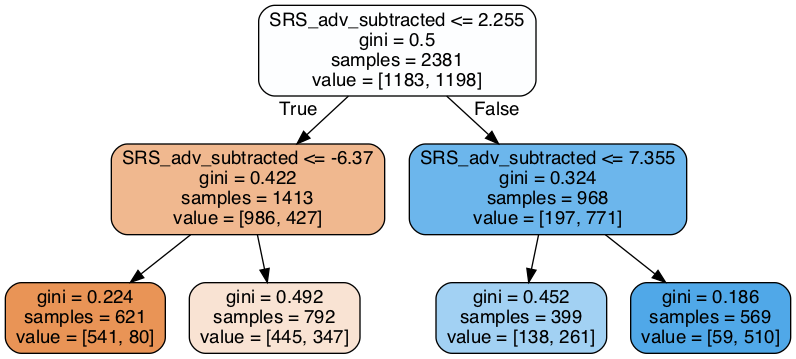

In [470]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
features = list(X.columns)
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [471]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score


In [472]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.69      0.66      0.68       518
           1       0.67      0.69      0.68       503

    accuracy                           0.68      1021
   macro avg       0.68      0.68      0.68      1021
weighted avg       0.68      0.68      0.68      1021



In [473]:
metrics.accuracy_score(y_test, predictions)


0.6767874632713027

# XGBoost

In [474]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [475]:
clf = XGBClassifier()


In [476]:
# Instantiate XGBClassifier
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [477]:
# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

In [478]:
# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 83.24%
Validation accuracy: 73.26%


# XGBoost - from medium article
https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7

In [482]:
from sklearn import datasets
import xgboost as xgb
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [483]:
y_train1 = pd.DataFrame(y_train)
X_train1 = pd.DataFrame(X_train, columns = X_test.columns)

In [484]:
D_train = xgb.DMatrix(X_train1, label=y_train1)
D_test = xgb.DMatrix(X_test, label=y_test)

In [485]:

param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations

In [486]:

model = xgb.train(param, D_train, steps)

In [487]:
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.7169134011757302
Recall = 0.7169550265971737
Accuracy = 0.7169441723800196


# SVM

In [445]:
from time import time

In [493]:
from sklearn.svm import SVC  
tic = time()
svclassifier = SVC(kernel='rbf', C=1000) 
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)
toc = time()
print("run time is {} seconds".format(toc-tic))

run time is 0.6790339946746826 seconds


In [90]:
len(X_test)

341

In [89]:
len(y_pred)

341

In [494]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_pred)))

[[383 135]
 [135 368]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       518
           1       0.73      0.73      0.73       503

    accuracy                           0.74      1021
   macro avg       0.74      0.74      0.74      1021
weighted avg       0.74      0.74      0.74      1021

The accuracy score is 0.7355533790401567


In [498]:
len(y_test)

1021

In [499]:
testing=X_test

In [500]:
testing['predicts']=y_pred

In [501]:
testing['actual']=y_test

In [502]:
testing.to_csv('testing.csv')

# KNN

In [209]:
df1.head()

,point_difference,team_seed,win,higher_or_lower_seed,year_x,Name,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,ORPG,DRPG,RPG,other_team_seed,SRS_adv,SOS_adv,pace_adv,ORtg_adv,eFG_perc_adv,SRS_adv_opponent,SOS_adv_opponent,pace_adv_opponent,ORtg_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,pace_adv_subtracted,ORtg_adv_subtracted,eFG_perc_adv_subtracted,round
0,15,1,1,1,2011,Ohio State,3.32,7.18,15.6,1.53,7.4,18.0,682.0,1282.0,0.532,77.1,0.494,0.413,0.705,11.2,23.3,34.5,16,25.84,8.38,64.1,120.0,0.563,-5.80,-4.93,68.8,102.0,0.491,31.64,13.31,-4.7,18.0,0.072,1
1,15,16,0,0,2011,UTSA,2.38,7.16,12.8,0.94,7.1,20.0,535.0,1130.0,0.473,70.9,0.431,0.356,0.706,10.7,24.3,35.0,1,-5.80,-4.93,68.8,102.0,0.491,25.84,8.38,64.1,120.0,0.563,-31.64,-13.31,4.7,-18.0,-0.072,1
2,1,8,1,1,2011,George Mason,3.31,6.75,14.3,1.31,6.7,17.0,614.0,1206.0,0.509,73.3,0.474,0.397,0.690,10.6,24.5,35.1,9,11.66,1.37,64.3,111.9,0.532,15.05,8.23,65.7,109.6,0.495,-3.39,-6.86,-1.4,2.3,0.037,1
3,1,9,0,0,2011,Villanova,3.75,6.34,13.8,1.15,6.3,18.0,574.0,1185.0,0.484,72.7,0.440,0.349,0.758,12.3,24.9,37.1,8,15.05,8.23,65.7,109.6,0.495,11.66,1.37,64.3,111.9,0.532,3.39,6.86,1.4,-2.3,-0.037,1
4,7,5,1,1,2011,West Virginia,4.29,4.61,15.1,1.25,6.3,19.0,540.0,1139.0,0.474,69.5,0.427,0.335,0.706,14.4,23.0,37.4,12,16.15,11.03,64.0,109.0,0.485,13.76,6.58,65.1,104.5,0.503,2.39,4.45,-1.1,4.5,-0.018,1


In [215]:
len(df1.columns)

37

In [490]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X_test.columns)
scaled_df_train.head()

,point_difference,team_seed,higher_or_lower_seed,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,ORPG,DRPG,RPG,other_team_seed,SRS_adv,SOS_adv,eFG_perc_adv,year_adv,SRS_adv_opponent,SOS_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,eFG_perc_adv_subtracted,BLKPG_opponent,STPG_opponent,APG_opponent,AST_TO_opponent,_3pm_opponent,_3pa_opponent,_2pm_opponent,_2pa_opponent,_2p_perc_opponent,FG_perc_opponent,_3p_perc_opponent,FT_perc_opponent,ORPG_opponent,DRPG_opponent,RPG_opponent,other_team_seed_opponent,BLKPG_subtracted,STPG_subtracted,APG_subtracted,AST_TO_subtracted,_3pm_subtracted,_3pa_subtracted,_2pm_subtracted,_2pa_subtracted,_2p_perc_subtracted,PTS_opponent,PTS_subtracted,FG_perc_subtracted,_3p_perc_subtracted,FT_perc_subtracted,ORPG_subtracted,DRPG_subtracted,RPG_subtracted,round,point_dff_with_neg
0,0.404974,-0.141609,-0.112514,-1.039319,-1.475636,-0.687787,-0.512721,-1.047936,-0.521340,-0.343867,-0.203323,-0.444186,-0.297095,-0.642955,-1.536996,0.452184,0.877896,1.027377,1.346569,1.609932,0.110722,0.381879,-0.637628,-1.145931,-1.626236,-2.314194,-0.180251,1.086099,1.730317,-0.322863,-2.128641,-1.589721,-0.057826,0.212039,1.325455,1.578004,-0.816287,-1.034460,0.456586,-0.150070,0.023842,0.175325,-0.987610,0.270809,-0.487333,-0.141609,0.738532,0.105936,-0.461812,-0.534462,-1.760484,-1.636505,0.428734,0.752321,-0.645343,-0.204048,-0.066762,-0.375197,-1.240133,0.196253,1.415434,0.571637,1.274286,0.069668,1.051121
1,2.056477,-1.245639,-0.112514,0.215801,-1.535716,-0.581775,-0.162251,-0.892355,-1.131021,1.306943,1.484514,-0.137722,0.593864,0.399357,0.205897,-0.063310,0.877896,0.551465,0.985496,2.049474,1.273111,0.132988,-0.145998,-0.506378,-2.598475,-2.854001,-1.506858,2.423522,1.915287,0.957386,-1.127862,-0.528461,-1.003737,-0.937653,-0.440625,-0.535852,-0.589258,0.050237,-1.737562,-1.080264,0.403913,-0.724759,0.420880,0.010180,0.295527,-1.245639,0.921207,-0.731961,0.315960,0.572652,-0.328399,-0.456743,1.693938,1.267897,1.141669,-1.222500,1.322559,1.116145,-0.160150,0.464606,0.346539,0.410991,0.474556,-0.751514,1.974683
2,2.056477,2.066452,-0.113411,-0.981518,-0.379168,-2.012937,-1.964672,-0.581192,-0.521340,0.530734,0.950235,-0.818753,-0.259182,-0.723133,-0.700407,-0.416017,0.877896,0.657224,1.057711,-1.247093,-2.662254,-2.518426,-1.129259,1.028549,0.481172,0.399372,-0.483475,-1.971943,-1.885229,-0.456222,-0.052025,-1.073831,-0.635883,0.711905,-1.131700,-1.441790,-0.070337,0.193274,-0.674771,-0.109626,0.334809,-1.270264,-0.205116,-0.406827,-0.416164,2.066452,-0.642942,0.524885,-1.006252,-1.973710,0.416285,0.723019,0.535789,0.666392,-0.106791,-1.561983,0.951157,-0.466504,-0.824755,0.598783,0.821603,0.812605,1.024370,-0.751514,-1.983438
3,-0.302814,0.079197,-0.113411,-1.245754,-0.461779,-0.740793,0.638825,1.752528,1.612544,-1.710432,-1.964016,0.339000,-1.093271,-0.242066,0.798481,0.750628,-1.261850,-2.462639,-2.516909,-1.027321,-0.240388,-0.677452,0.761628,0.261086,0.485179,0.395220,0.236683,-0.454193,-0.691580,0.370606,-0.510715,1.763568,1.991649,1.361731,1.555813,1.578004,0.913453,0.765422,0.525153,0.213919,0.300257,-1.488466,1.568538,-0.823834,0.509034,0.079197,-0.511645,-1.658058,-2.017356,-0.534462,0.129868,0.015162,-2.344982,-2.427062,-0.131271,1.681973,-2.020065,-0.344762,0.393688,1.576354,-2.147552,-1.235623,-2.099574,0.069668,-0.664064
4,0.404974,1.183228,-0.113411,-1.344842,0.552079,-0.952817,-0.963327,-1.047936,-0.521340,-0.988886,-1.107955,0.100639,-0.998488,-0.442510,-1.536996,0.018084,-1.209661,0.339949,-0.639331,-0.587779,-0.519681,-0.712421,0.383451,-1.529662,0.383681,0.505257,1.070551,-0.566062,-0.784730,-0.482894,-0.060365,-0.012570,-1.529243,-1.287559,-0.824556,-0.233872,-1.097369,-0.641108,-1.531860,-1.808242,-1.600094,0.639004,-0.361615,0.218683,-0.095903,1.183228,-0.888410,0.414636,0.432625,0.240518,-0.156549,-0.220790,0.107567,-0.402354,1.166149,-1.392241,0.290885,1.024838,0.061385,-0.436293,-0.643180,0.089701,-0.375157,0.069668,-1.059876


In [491]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

In [492]:
# Import the necessary functions
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
# Complete the function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.6515151515151515
Recall Score: 0.68389662027833
Accuracy Score: 0.6640548481880509
F1 Score: 0.667313288069835


# Logistic Regression

# Neural Netowrk

# Some data analysis

In [99]:
test=X_test
test['predict']=y_pred
test['actual']=y_test

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [100]:
test

,point_difference,team_seed,higher_or_lower_seed,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,ORPG,DRPG,RPG,other_team_seed,SRS_adv,SOS_adv,pace_adv,ORtg_adv,eFG_perc_adv,year_adv,SRS_adv_opponent,SOS_adv_opponent,pace_adv_opponent,ORtg_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,pace_adv_subtracted,ORtg_adv_subtracted,eFG_perc_adv_subtracted,round,predict,actual
348,9,4,1,2.85,6.00,14.3,1.55,7.5,20.0,676.0,1263.0,0.535,75.2,0.484,0.383,0.707,10.7,24.5,35.1,13,21.28,10.05,64.1,116.1,0.549,2013,2.36,-3.27,64.0,113.1,0.539,18.92,13.32,0.1,3.0,0.010,1,1,1
229,3,10,0,2.56,6.50,14.6,1.13,5.3,18.0,651.0,1299.0,0.501,71.6,0.441,0.302,0.671,15.0,23.4,38.4,7,12.13,7.53,64.8,106.8,0.483,2012,13.86,3.25,66.4,110.7,0.535,-1.73,4.28,-1.6,-3.9,-0.052,1,1,0
228,3,7,1,3.29,6.81,13.7,1.03,6.4,17.0,575.0,1107.0,0.519,74.0,0.473,0.376,0.715,11.0,26.2,37.1,10,13.86,3.25,66.4,110.7,0.535,2012,12.13,7.53,64.8,106.8,0.483,1.73,-4.28,1.6,3.9,0.052,1,1,1
1069,15,16,0,2.78,6.78,13.2,1.06,8.8,25.0,553.0,1038.0,0.533,76.8,0.453,0.351,0.741,8.8,25.6,34.4,1,-4.78,-5.50,71.4,107.4,0.530,2019,23.94,11.35,75.9,112.7,0.529,-28.72,-16.85,-4.5,-5.3,0.001,1,0,0
715,3,4,0,4.18,6.39,13.5,1.37,9.3,24.0,599.0,1181.0,0.507,81.5,0.459,0.387,0.722,12.2,24.1,36.3,1,19.23,10.59,68.4,117.7,0.537,2016,18.05,8.64,69.5,112.8,0.525,1.18,1.95,-1.1,4.9,0.012,3,1,0
911,2,3,0,4.27,7.39,14.4,1.15,7.0,19.0,631.0,1226.0,0.515,75.2,0.464,0.366,0.701,11.0,24.9,35.9,1,19.38,9.60,68.3,108.4,0.520,2018,26.64,10.24,70.1,122.3,0.595,-7.26,-0.64,-1.8,-13.9,-0.075,4,0,0
793,9,13,0,4.41,5.68,13.4,1.19,6.4,17.0,697.0,1254.0,0.556,73.6,0.496,0.369,0.702,9.4,24.9,34.2,4,6.67,-3.27,65.4,112.4,0.554,2017,20.13,8.79,70.0,112.6,0.557,-13.46,-12.06,-4.6,-0.2,-0.003,1,0,0
85,11,12,0,4.12,6.12,15.0,1.40,7.9,20.0,581.0,1163.0,0.500,70.2,0.463,0.400,0.691,9.1,24.1,33.2,1,11.23,2.79,63.2,109.5,0.531,2011,24.10,7.62,69.7,116.0,0.570,-12.87,-4.83,-6.5,-6.5,-0.039,3,0,0
1067,2,3,0,4.91,7.38,14.0,1.13,7.3,20.0,605.0,1144.0,0.529,73.1,0.472,0.368,0.728,8.8,25.4,34.3,1,22.79,9.53,67.6,106.9,0.535,2019,27.79,5.01,71.7,122.2,0.590,-5.00,4.52,-4.1,-15.3,-0.055,4,0,1
662,1,8,1,5.00,5.21,13.8,1.03,7.6,19.0,592.0,1342.0,0.441,76.0,0.425,0.392,0.738,13.2,29.2,42.4,9,12.04,7.64,70.8,106.3,0.488,2016,15.89,6.28,66.1,109.0,0.516,-3.85,1.36,4.7,-2.7,-0.028,1,0,0


In [106]:
i = 0
correct_incorrect = []
for thing in list(test['actual']):
    if list(test['predict'])[i]==thing:
        correct_incorrect.append(1)
        i+=1
    else:
        correct_incorrect.append(0)
        i+=1

In [107]:
test['correct_incorrect']=correct_incorrect

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [110]:
pd.set_option('display.max_rows', 400)
test

,point_difference,team_seed,higher_or_lower_seed,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,ORPG,DRPG,RPG,other_team_seed,SRS_adv,SOS_adv,pace_adv,ORtg_adv,eFG_perc_adv,year_adv,SRS_adv_opponent,SOS_adv_opponent,pace_adv_opponent,ORtg_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,pace_adv_subtracted,ORtg_adv_subtracted,eFG_perc_adv_subtracted,round,predict,actual,correct_incorrect
348,9,4,1,2.85,6.00,14.3,1.55,7.5,20.0,676.0,1263.0,0.535,75.2,0.484,0.383,0.707,10.7,24.5,35.1,13,21.28,10.05,64.1,116.1,0.549,2013,2.36,-3.27,64.0,113.1,0.539,18.92,13.32,0.1,3.0,0.010,1,1,1,1
229,3,10,0,2.56,6.50,14.6,1.13,5.3,18.0,651.0,1299.0,0.501,71.6,0.441,0.302,0.671,15.0,23.4,38.4,7,12.13,7.53,64.8,106.8,0.483,2012,13.86,3.25,66.4,110.7,0.535,-1.73,4.28,-1.6,-3.9,-0.052,1,1,0,0
228,3,7,1,3.29,6.81,13.7,1.03,6.4,17.0,575.0,1107.0,0.519,74.0,0.473,0.376,0.715,11.0,26.2,37.1,10,13.86,3.25,66.4,110.7,0.535,2012,12.13,7.53,64.8,106.8,0.483,1.73,-4.28,1.6,3.9,0.052,1,1,1,1
1069,15,16,0,2.78,6.78,13.2,1.06,8.8,25.0,553.0,1038.0,0.533,76.8,0.453,0.351,0.741,8.8,25.6,34.4,1,-4.78,-5.50,71.4,107.4,0.530,2019,23.94,11.35,75.9,112.7,0.529,-28.72,-16.85,-4.5,-5.3,0.001,1,0,0,1
715,3,4,0,4.18,6.39,13.5,1.37,9.3,24.0,599.0,1181.0,0.507,81.5,0.459,0.387,0.722,12.2,24.1,36.3,1,19.23,10.59,68.4,117.7,0.537,2016,18.05,8.64,69.5,112.8,0.525,1.18,1.95,-1.1,4.9,0.012,3,1,0,0
911,2,3,0,4.27,7.39,14.4,1.15,7.0,19.0,631.0,1226.0,0.515,75.2,0.464,0.366,0.701,11.0,24.9,35.9,1,19.38,9.60,68.3,108.4,0.520,2018,26.64,10.24,70.1,122.3,0.595,-7.26,-0.64,-1.8,-13.9,-0.075,4,0,0,1
793,9,13,0,4.41,5.68,13.4,1.19,6.4,17.0,697.0,1254.0,0.556,73.6,0.496,0.369,0.702,9.4,24.9,34.2,4,6.67,-3.27,65.4,112.4,0.554,2017,20.13,8.79,70.0,112.6,0.557,-13.46,-12.06,-4.6,-0.2,-0.003,1,0,0,1
85,11,12,0,4.12,6.12,15.0,1.40,7.9,20.0,581.0,1163.0,0.500,70.2,0.463,0.400,0.691,9.1,24.1,33.2,1,11.23,2.79,63.2,109.5,0.531,2011,24.10,7.62,69.7,116.0,0.570,-12.87,-4.83,-6.5,-6.5,-0.039,3,0,0,1
1067,2,3,0,4.91,7.38,14.0,1.13,7.3,20.0,605.0,1144.0,0.529,73.1,0.472,0.368,0.728,8.8,25.4,34.3,1,22.79,9.53,67.6,106.9,0.535,2019,27.79,5.01,71.7,122.2,0.590,-5.00,4.52,-4.1,-15.3,-0.055,4,0,1,0
662,1,8,1,5.00,5.21,13.8,1.03,7.6,19.0,592.0,1342.0,0.441,76.0,0.425,0.392,0.738,13.2,29.2,42.4,9,12.04,7.64,70.8,106.3,0.488,2016,15.89,6.28,66.1,109.0,0.516,-3.85,1.36,4.7,-2.7,-0.028,1,0,0,1


In [115]:
incorrect=test[(test['correct_incorrect']==0)]

In [116]:
correct = test[(test['correct_incorrect']==1)]

In [119]:
wins = test[(test['actual']==1)]

In [121]:
wins_correct=wins[(wins['correct_incorrect']==1)]

In [122]:
wins_incorrect=wins[(wins['correct_incorrect']==0)]

In [120]:
losses = test[(test['actual']==0)]

In [128]:
losses_correct=losses[(losses['correct_incorrect']==1)]

In [129]:
losses_incorrect=losses[(losses['correct_incorrect']==0)]

In [118]:
correct[['actual','predict','round','correct_incorrect','higher_or_lower_seed','point_difference']]

,actual,predict,round,correct_incorrect,higher_or_lower_seed,point_difference
348,1,1,1,1,1,9
228,1,1,1,1,1,3
1069,0,0,1,1,0,15
911,0,0,4,1,0,2
793,0,0,1,1,0,9
85,0,0,3,1,0,11
662,0,0,1,1,1,1
426,0,0,2,1,0,8
594,1,1,1,1,1,15
542,1,1,1,1,1,5


In [133]:
wins_incorrect

,point_difference,team_seed,higher_or_lower_seed,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,ORPG,DRPG,RPG,other_team_seed,SRS_adv,SOS_adv,pace_adv,ORtg_adv,eFG_perc_adv,year_adv,SRS_adv_opponent,SOS_adv_opponent,pace_adv_opponent,ORtg_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,pace_adv_subtracted,ORtg_adv_subtracted,eFG_perc_adv_subtracted,round,predict,actual,correct_incorrect
1067,2,3,0,4.91,7.38,14.0,1.13,7.3,20.0,605.0,1144.0,0.529,73.1,0.472,0.368,0.728,8.8,25.4,34.3,1,22.79,9.53,67.6,106.9,0.535,2019,27.79,5.01,71.7,122.2,0.590,-5.00,4.52,-4.1,-15.3,-0.055,4,0,1,0
1130,1,3,0,4.91,7.38,14.0,1.13,7.3,20.0,605.0,1144.0,0.529,73.1,0.472,0.368,0.728,8.8,25.4,34.3,2,22.79,9.53,67.6,106.9,0.535,2019,24.93,12.34,68.1,113.1,0.552,-2.14,-2.81,-0.5,-6.2,-0.017,5,0,1,0
67,9,13,0,3.21,8.61,12.3,0.82,5.8,17.0,619.0,1201.0,0.515,69.8,0.459,0.340,0.675,13.8,23.7,37.5,4,2.81,-3.13,64.3,106.2,0.509,2011,18.60,8.20,67.8,108.6,0.526,-15.79,-11.33,-3.5,-2.4,-0.017,1,0,1,0
869,5,2,1,3.24,5.50,13.8,1.21,6.7,17.0,662.0,1297.0,0.510,76.3,0.476,0.398,0.758,10.3,26.5,36.8,7,18.25,7.63,67.3,113.8,0.537,2017,16.75,2.19,61.3,117.6,0.578,1.50,5.44,6.0,-3.8,-0.041,2,0,1,0
689,1,2,0,3.41,6.74,16.1,1.45,8.6,25.0,614.0,1089.0,0.564,77.0,0.467,0.344,0.777,9.3,26.4,35.6,1,24.08,9.71,67.3,115.4,0.561,2016,23.87,11.22,69.7,115.0,0.564,0.21,-1.51,-2.4,0.4,-0.003,4,0,1,0
86,1,11,0,3.68,8.53,14.2,1.23,8.2,23.0,547.0,1121.0,0.488,71.5,0.435,0.359,0.719,10.9,21.1,32.0,10,8.56,3.78,65.3,108.3,0.511,2011,13.48,6.45,69.3,99.3,0.490,-4.92,-2.67,-4.0,9.0,0.021,3,0,1,0
973,15,16,0,2.50,7.53,15.4,1.28,10.2,26.0,540.0,1099.0,0.491,73.9,0.445,0.387,0.649,9.9,24.9,34.8,1,-2.02,-3.84,69.2,105.6,0.531,2018,22.21,9.07,60.6,110.4,0.527,-24.23,-12.91,8.6,-4.8,0.004,1,0,1,0
317,7,12,0,5.12,8.39,12.6,1.12,6.9,21.0,671.0,1368.0,0.490,78.2,0.437,0.331,0.684,13.2,25.6,38.8,5,14.42,4.14,70.5,108.4,0.491,2013,18.76,9.73,61.4,104.4,0.486,-4.34,-5.59,9.1,4.0,0.005,1,0,1,0
161,7,12,0,3.71,10.68,12.2,1.07,7.4,22.0,537.0,1177.0,0.456,68.4,0.410,0.337,0.689,12.4,21.3,33.7,5,8.79,0.63,65.2,103.6,0.476,2012,17.42,3.80,67.0,113.3,0.543,-8.63,-3.17,-1.8,-9.7,-0.067,1,0,1,0
42,3,7,1,5.81,5.47,14.6,0.98,5.2,16.0,619.0,1216.0,0.509,70.0,0.456,0.329,0.683,11.8,25.5,37.3,10,11.70,7.93,66.8,103.8,0.502,2011,13.70,11.67,66.0,103.1,0.489,-2.00,-3.74,0.8,0.7,0.013,1,0,1,0
